In [44]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, LSTM

In [45]:
# Get the data, read csv file into data frame
df = pd.read_csv("AAPL.csv")
df

Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100039   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094820   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087861   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090035   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092646   
...           ...         ...         ...         ...         ...         ...   
10526  2022-09-13  159.899994  160.539993  153.369995  153.839996  153.839996   
10527  2022-09-14  154.789993  157.100006  153.610001  155.309998  155.309998   
10528  2022-09-15  154.649994  155.240005  151.380005  152.369995  152.369995   
10529  2022-09-16  151.210007  151.350006  148.369995  150.699997  150.699997   
10530  2022-09-19  149.309998  154.559998  149.100006  154.479996  154.479996   

          Volume  
0      469033600  
1      175884800  
2      105728000  
3       86441600  
4       73449600  
...          ...  
10526  122656600  
10527   87965400  
10528   90481100  
10529  162157000  
10530   81474200  

[10531 rows x 7 columns]

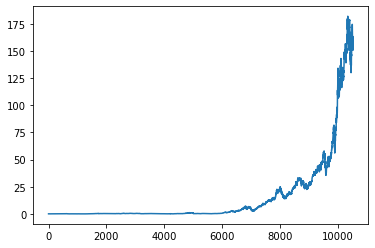

In [47]:
# Vistulize the input data frame
plt.plot(df['Close'])
plt.show()

In [105]:
# Choose "Closed" price column as our input variable
close_df= df['Close']
close_df_train = close_df.loc[close_df.index < len(close_df)*0.8]
close_df_test = close_df.loc[close_df.index >= len(close_df)*0.8]

print(close_df_train.head())
print()
print(close_df_test.head())

0    0.128348
1    0.121652
2    0.112723
3    0.115513
4    0.118862
Name: Close, dtype: float64

8425    20.912144
8426    21.172501
8427    21.205713
8428    21.209642
8429    21.029285
Name: Close, dtype: float64


In [73]:
# Scale the training data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_df_train.values.reshape(-1,1))
scaled_data.shape

(8425, 1)

In [70]:
# Use the previous 30 days 'close' price to predict the 31st day's price
previous_days = 30

In [71]:
# Splite data into X_train and y_train
X_train = []
y_train = []

for i in range(previous_days, len(scaled_data)):
    X_train.append(scaled_data[i-previous_days:i, 0])
    y_train.append(scaled_data[i, 0])

In [100]:
# Convert the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(8365, 60, 1)
(8365,)


In [75]:
# Reshape the X_train since LSTM needs 3-dimensional inputs
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(8365, 60, 1)

In [76]:
# Build the LSTM model
model = Sequential()
# Add LSTM layer
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 50))
# prediction output layer
model.add(Dense(units=1))

In [77]:
# compile and train the data
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size =100, epochs=20)

Epoch 1/20
84/84 [==============================] - 10s 68ms/step - loss: 0.0040
Epoch 2/20
84/84 [==============================] - 6s 70ms/step - loss: 1.1894e-04
Epoch 3/20
84/84 [==============================] - 6s 71ms/step - loss: 1.1103e-04
Epoch 4/20
84/84 [==============================] - 6s 71ms/step - loss: 1.0729e-04
Epoch 5/20
84/84 [==============================] - 6s 69ms/step - loss: 1.0521e-04
Epoch 6/20
84/84 [==============================] - 6s 71ms/step - loss: 1.0719e-04
Epoch 7/20
84/84 [==============================] - 6s 72ms/step - loss: 9.7802e-05
Epoch 8/20
84/84 [==============================] - 6s 72ms/step - loss: 8.4433e-05
Epoch 9/20
84/84 [==============================] - 6s 70ms/step - loss: 1.1608e-04
Epoch 10/20
84/84 [==============================] - 6s 71ms/step - loss: 8.4419e-05
Epoch 11/20
84/84 [==============================] - 6s 71ms/step - loss: 8.1992e-05
Epoch 12/20
84/84 [==============================] - 6s 70ms/step - loss: 7.8

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [81]:
#### Test model ####

# Scale the testing data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_data = scaler.fit_transform(close_df_test.values.reshape(-1,1))
scaled_test_data.shape

(2106, 1)

In [82]:
# Create X_test and y_test
X_test = []
y_test = []

for i in range(previous_days, len(scaled_test_data)):
    X_test.append(scaled_test_data[i-previous_days:i, 0])
    y_test.append(scaled_test_data[i, 0])

In [83]:
# Convert the X_test and y_test to numpy arrays
X_test = np.array(X_test)
print(X_test.shape)

(2046, 60)


In [84]:
# reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print(X_test.shape)

(2046, 60, 1)


In [87]:
# Predict the data

prediction = model.predict(X_test)
prediction = scaler.inverse_transform(predictions)

64/64 [==============================] - 1s 12ms/step


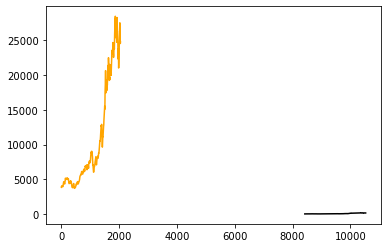

In [106]:
# plot test predictions

plt.plot(prediction, color = 'orange')
plt.plot(close_df_test, color = 'black')
plt.show()